# Прогнозирование оттока и кластеризация клиентов сети фитнес-центров

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание данных</a></span></li><li><span><a href="#Загрузка-данных-и-импорт-библиотек" data-toc-modified-id="Загрузка-данных-и-импорт-библиотек-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Загрузка данных и импорт библиотек</a></span></li><li><span><a href="#Исследовательский-анализ-данных-(EDA)" data-toc-modified-id="Исследовательский-анализ-данных-(EDA)-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Исследовательский анализ данных (EDA)</a></span><ul class="toc-item"><li><span><a href="#Изучение-данных" data-toc-modified-id="Изучение-данных-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Изучение данных</a></span></li><li><span><a href="#Диаграммы-и-распределения" data-toc-modified-id="Диаграммы-и-распределения-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Диаграммы и распределения</a></span></li><li><span><a href="#Матрица-корреляций" data-toc-modified-id="Матрица-корреляций-3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span>Матрица корреляций</a></span></li></ul></li><li><span><a href="#Модель-прогнозирования-оттока-клиентов" data-toc-modified-id="Модель-прогнозирования-оттока-клиентов-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Модель прогнозирования оттока клиентов</a></span></li><li><span><a href="#Кластеризация-клиентов" data-toc-modified-id="Кластеризация-клиентов-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Кластеризация клиентов</a></span></li><li><span><a href="#Выводы-и-рекомендации" data-toc-modified-id="Выводы-и-рекомендации-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Выводы и рекомендации</a></span></li></ul></div>

## Описание данных

Набор данных включает следующие поля:

- `'Churn'` — факт оттока в текущем месяце;
- Текущие поля в датасете:
    - Данные клиента за предыдущий до проверки факта оттока месяц:
        - `'gender'` — пол;
        - `'Near_Location'` — проживание или работа в районе, где находится фитнес-центр;
        - `'Partner'` — сотрудник компании-партнёра клуба (сотрудничество с компаниями, чьи сотрудники могут получать скидки на абонемент — в таком случае фитнес-центр хранит информацию о работодателе клиента);
        - `Promo_friends` — факт первоначальной записи в рамках акции «приведи друга» (использовал промо-код от знакомого при оплате первого абонемента);
        - `'Phone'` — наличие контактного телефона;
        - `'Age'` — возраст;
        - `'Lifetime'` — время с момента первого обращения в фитнес-центр (в месяцах).
- Информация на основе журнала посещений, покупок и информация о текущем статусе абонемента клиента:
    - `'Contract_period'` — длительность текущего действующего абонемента (месяц, 3 месяца, 6 месяцев, год);
    - `'Month_to_end_contract'` — срок до окончания текущего действующего абонемента (в месяцах);
    - `'Group_visits'` — факт посещения групповых занятий;
    - `'Avg_class_frequency_total'` — средняя частота посещений в неделю за все время с начала действия абонемента;
    - `'Avg_class_frequency_current_month'` — средняя частота посещений в неделю за предыдущий месяц;
    - `'Avg_additional_charges_total'` — суммарная выручка от других услуг фитнес-центра: кафе, спорт-товары, косметический и массажный салон.

## Загрузка данных и импорт библиотек

In [30]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import roc_auc_score

In [31]:
gym = pd.read_csv('/datasets/gym_churn.csv')

## Исследовательский анализ данных (EDA)

### Изучение данных

In [32]:
gym.head(10)

,gender,Near_Location,Partner,Promo_friends,Phone,Contract_period,Group_visits,Age,Avg_additional_charges_total,Month_to_end_contract,Lifetime,Avg_class_frequency_total,Avg_class_frequency_current_month,Churn
0,1,1,1,1,0,6,1,29,14.227470,5.0,3,0.020398,0.000000,0
1,0,1,0,0,1,12,1,31,113.202938,12.0,7,1.922936,1.910244,0
2,0,1,1,0,1,1,0,28,129.448479,1.0,2,1.859098,1.736502,0
3,0,1,1,1,1,12,1,33,62.669863,12.0,2,3.205633,3.357215,0
4,1,1,1,1,1,1,0,26,198.362265,1.0,3,1.113884,1.120078,0
5,1,1,0,0,1,1,1,34,450.743960,1.0,3,2.623477,2.637007,0
6,1,1,1,1,0,6,1,32,94.266389,6.0,2,1.138941,1.277242,0
7,0,1,0,0,1,1,0,30,217.786641,1.0,0,1.213502,1.049387,1
8,1,1,1,1,1,1,1,23,45.409909,1.0,1,1.106239,1.059333,0
9,0,1,0,0,1,1,0,31,65.310836,1.0,11,1.810852,1.951368,0


In [33]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

Для удобства приведем названия столбцов к нижнему регистру:

In [34]:
gym.columns = gym.columns.str.lower()
gym.columns.tolist()

['gender',
 'near_location',
 'partner',
 'promo_friends',
 'phone',
 'contract_period',
 'group_visits',
 'age',
 'avg_additional_charges_total',
 'month_to_end_contract',
 'lifetime',
 'avg_class_frequency_total',
 'avg_class_frequency_current_month',
 'churn']

In [35]:
gym.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   near_location                      4000 non-null   int64  
 2   partner                            4000 non-null   int64  
 3   promo_friends                      4000 non-null   int64  
 4   phone                              4000 non-null   int64  
 5   contract_period                    4000 non-null   int64  
 6   group_visits                       4000 non-null   int64  
 7   age                                4000 non-null   int64  
 8   avg_additional_charges_total       4000 non-null   float64
 9   month_to_end_contract              4000 non-null   float64
 10  lifetime                           4000 non-null   int64  
 11  avg_class_frequency_total          4000 non-null   float

In [36]:
gym.isnull().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

In [37]:
gym.duplicated().sum()

0

Пропусков и дубликатов нет, типы данных в порядке, названия столбцов в удобном виде. Дальше посмотрим на средние значения и стандартные отклонения:

In [38]:
gym.describe().T

,count,mean,std,min,25%,50%,75%,max
gender,4000.0,0.510250,0.499957,0.000000,0.000000,1.000000,1.000000,1.000000
near_location,4000.0,0.845250,0.361711,0.000000,1.000000,1.000000,1.000000,1.000000
partner,4000.0,0.486750,0.499887,0.000000,0.000000,0.000000,1.000000,1.000000
promo_friends,4000.0,0.308500,0.461932,0.000000,0.000000,0.000000,1.000000,1.000000
phone,4000.0,0.903500,0.295313,0.000000,1.000000,1.000000,1.000000,1.000000
contract_period,4000.0,4.681250,4.549706,1.000000,1.000000,1.000000,6.000000,12.000000
group_visits,4000.0,0.412250,0.492301,0.000000,0.000000,0.000000,1.000000,1.000000
age,4000.0,29.184250,3.258367,18.000000,27.000000,29.000000,31.000000,41.000000
avg_additional_charges_total,4000.0,146.943728,96.355602,0.148205,68.868830,136.220159,210.949625,552.590740
month_to_end_contract,4000.0,4.322750,4.191297,1.000000,1.000000,1.000000,6.000000,12.000000


Посмотрим на средние значения признаков в двух группах — тех, кто ушел в отток и тех, кто остался:

In [39]:
gym.groupby('churn').agg('mean').T

churn,0,1
gender,0.510037,0.510839
near_location,0.873086,0.768143
partner,0.534195,0.355325
promo_friends,0.353522,0.183789
phone,0.903709,0.902922
contract_period,5.747193,1.728558
group_visits,0.464103,0.268615
age,29.976523,26.989632
avg_additional_charges_total,158.445715,115.082899
month_to_end_contract,5.283089,1.662582


**Вывод:** Видно, что средние значения почти по всем признакам у группы оттока ниже, чем у тех, кто остался. 

### Диаграммы и распределения

Построим столбчатые гистограммы и распределения признаков для тех, кто ушёл (отток) и тех, кто остался (не попали в отток):

In [40]:
noncat_features = gym[['age','avg_additional_charges_total','month_to_end_contract','lifetime','avg_class_frequency_total','avg_class_frequency_current_month']]
cat_features = gym[['contract_period','gender','near_location','partner','promo_friends','phone','group_visits','churn']]

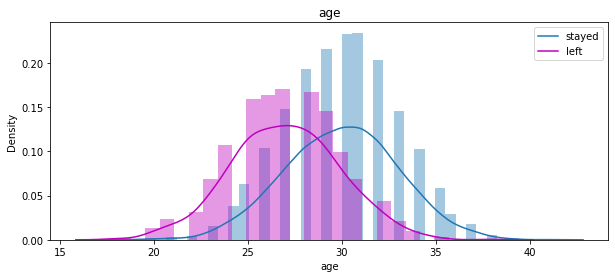

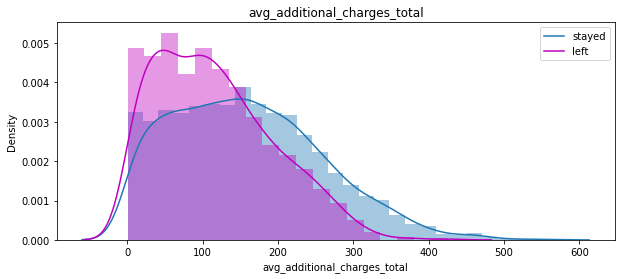

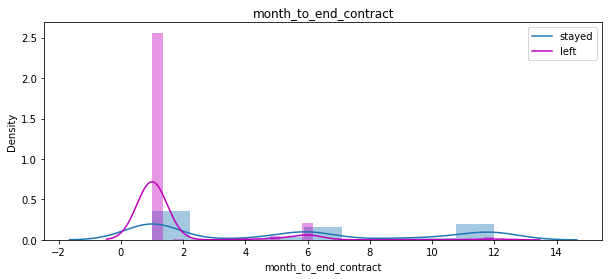

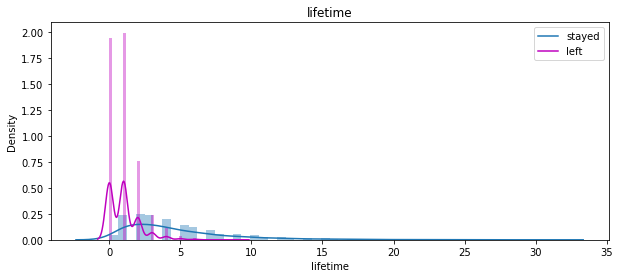

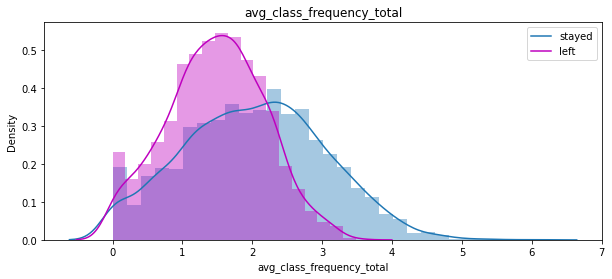

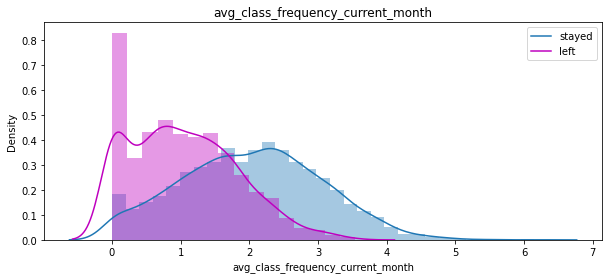

In [41]:
for column in noncat_features.columns:
    plt.figure(figsize=(10, 4))
    sns.distplot(gym.query('churn == 0')[column])
    sns.distplot(gym.query('churn == 1')[column], color = 'm')
    plt.legend(labels = ('stayed', 'left'))
    plt.title(column)
    plt.show()

**Вывод:** По данным распределениям можно сказать:
- Более молодые клиенты уходят чаще
- Клиенты, которые ушли, тратят меньше денег на дополнительные услуги и чаще всего приобретают минимальный абонемент (на один месяц)
- Клиенты в основном уходят в первые полгода (после полугода занятий уход в отток почти не происходит)
- Клиенты, которые ушли, обычно посещают фитнес-центр 1-2 раза в неделю
- Клиенты, не посещавшие зал на последний месяц, с большой вероятностью уйдут в отток, а посетившие зал более 4 раз за последний месяц — скорее всего останутся

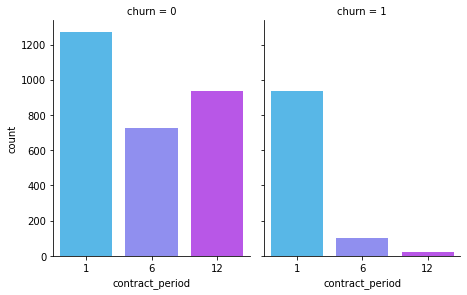

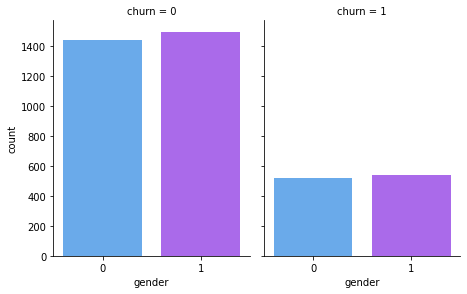

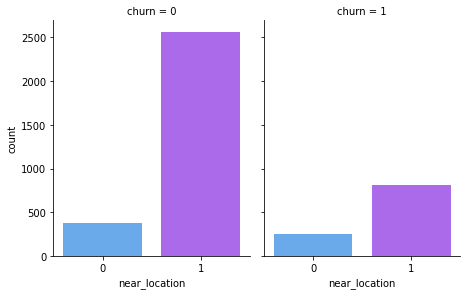

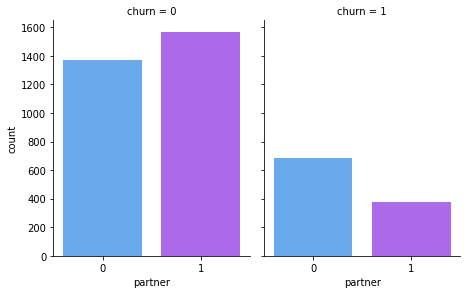

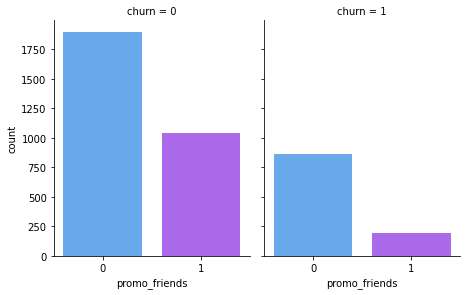

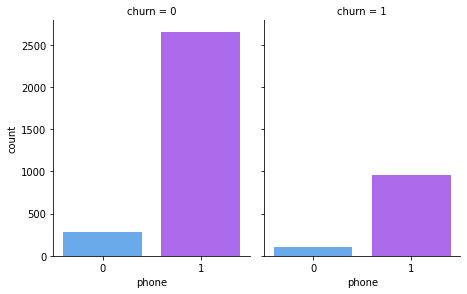

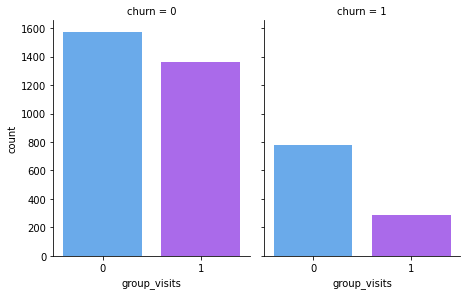

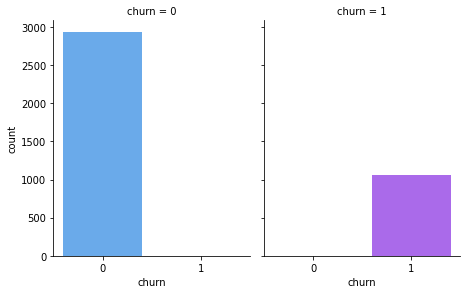

In [42]:
for column in cat_features.columns:
    sns.catplot(column, col='churn', data = cat_features, kind='count', height=4, aspect=.8, palette='cool')

**Вывод:** По данным диаграммам можно сказать:
- Уходят чаще те, кто купил минимальный абонемент (на один месяц) и редко посещает групповые занятия
- Отток практически не зависит от пола клиентов
- Остаются чаще те, кто живет/работает рядом с фитнес-центром и оставил номер телефона

### Матрица корреляций

Построим матрицу корреляций и визуализируем ее с помощью тепловой карты:

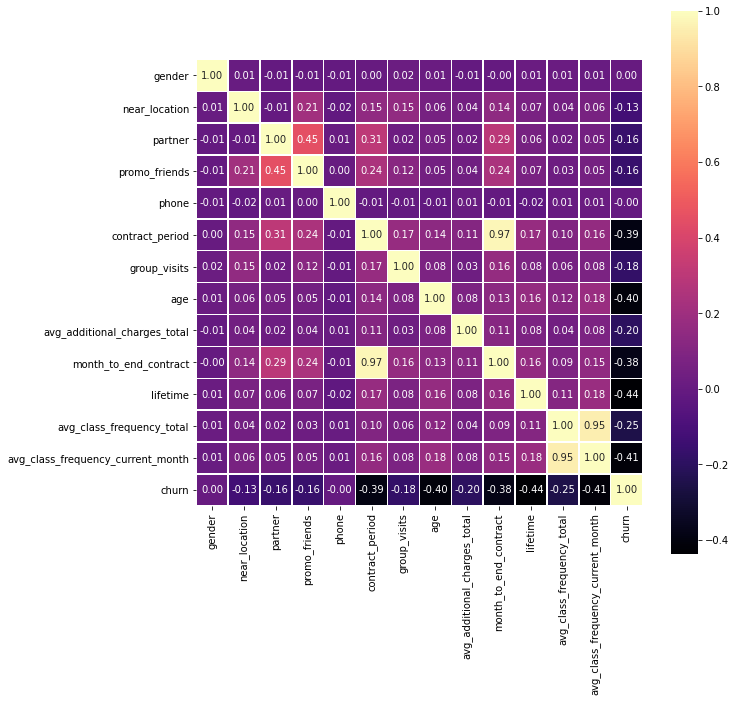

In [43]:
cm = gym.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(cm, annot = True, fmt = '0.2f', linewidths=.5, square=True, cmap='magma')
plt.show()

**Вывод:** Выделяются сильно коррелирующие признаки, такие как `month_to_end_contract`—`contract_period` и `avg_class_frequency_current_month`—`avg_class_frequency_total`, так как они непосредственно зависимы друг от друга. Еще выделяется зависимость `partner`—`promo_friends`. Это говорит о мультиколлениарности, а значит, лучше всего избавляться от одной из таких переменных, чтобы модель работала объективно.
          

Совсем не имеют корреляции с фактом оттока такие признаки, как пол и наличие контактного телефона. Наблюдается небольшая отрицательная корреляция между фактом оттока и такими признаками, как возраст, длительность абонемента, время с момента первого посещения, количество месяцев до окончания абонемента и количество посещений за последний месяц. 

## Модель прогнозирования оттока клиентов

Разбивка данных:

In [44]:
X = gym.drop('churn', axis=1)
y = gym['churn']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Обучим модель логистической регрессией:

In [45]:
lr_model = LogisticRegression(random_state = 0)
lr_model.fit(X_train, y_train)
lr_predictions = lr_model.predict(X_test)
lr_probabilities = lr_model.predict_proba(X_test)[:,1]

Обучим модель случайным лесом:

In [46]:
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_probabilities = rf_model.predict_proba(X_test)[:,1]

Напишем функцию для вывода метрик:

In [47]:
def show_metrics(y_true, y_pred, y_proba, title):
    print(title)
    print('\tAccuracy: {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))

In [48]:
show_metrics(y_test, lr_predictions, lr_probabilities , title = 'Метрики модели логистической регрессии:')
show_metrics(y_test, rf_predictions, rf_probabilities, title = '\nМетрики модели случайного леса:')

Метрики модели логистической регрессии:
	Accuracy: 0.91
	Precision: 0.82
	Recall: 0.80
	F1: 0.81
	ROC_AUC: 0.96

Метрики модели случайного леса:
	Accuracy: 0.92
	Precision: 0.84
	Recall: 0.82
	F1: 0.83
	ROC_AUC: 0.97


**Вывод:** По метрикам отличия незначительные, но модель логистической регрессии все-таки оказалась чуть лучше. Еще можно сказать, что обе модели показывают хороший *roc_auc*, что говорит о достойном качестве.

Дополнительно можем посмотреть на важность признаков для модели логистической регрессии. Чтобы результат получился более наглядным, уберем из обучающей выборки следующие признаки — `month_to_end_contract` и `avg_class_frequency_total`:

In [49]:
lr_model_new = LogisticRegression(random_state = 0)
X_train_new = X_train.drop(['avg_class_frequency_total', 'month_to_end_contract'], axis=1)
lr_model_new.fit(X_train_new, y_train)

lr_features = pd.DataFrame({'feature' : X_train_new.columns, 'coef' : lr_model_new.coef_[0]})
lr_features.sort_values('coef', ascending=True)

,feature,coef
10,avg_class_frequency_current_month,-1.223977
9,lifetime,-1.207597
3,promo_friends,-0.982862
6,group_visits,-0.785333
5,contract_period,-0.244443
7,age,-0.108212
8,avg_additional_charges_total,-0.007292
0,gender,0.239127
2,partner,0.289962
1,near_location,0.677119


**Вывод:** Отрицательные значения коэффициентов говорят нам о том, что чем меньше значение признака, тем выше вероятность оттока. Получается, наиболее важными признаками оказались: средняя частота посещений в неделю за предыдущий месяц, время с момента первого обращения в фитнес-центр, факт посещения групповых занятий и факт первоначальной записи в рамках акции «приведи друга».  

## Кластеризация клиентов

Стандартизируем данные:

In [50]:
sc = StandardScaler()
x_sc = sc.fit_transform(X)

Построим матрицу расстояний и нарисуем дендрограмму:

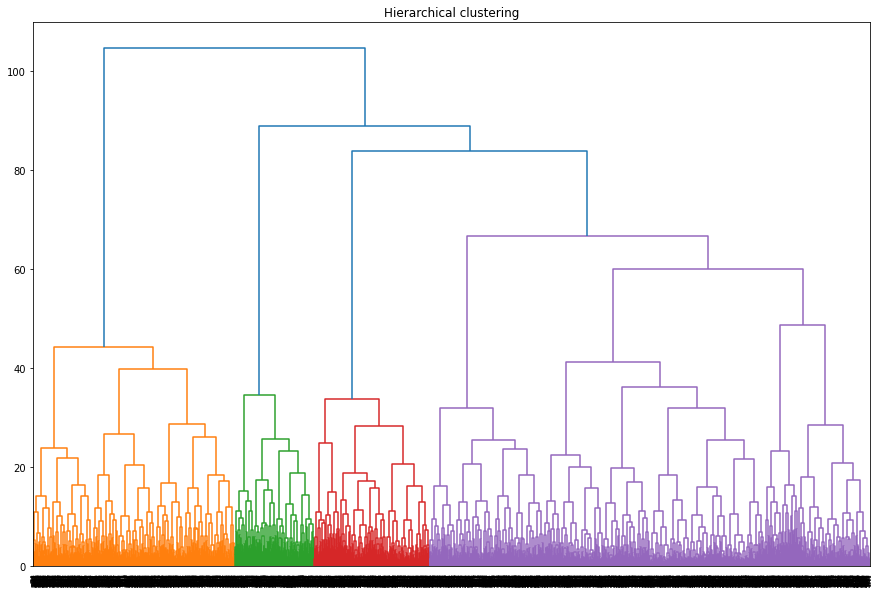

In [51]:
linked = linkage(x_sc, method='ward')
plt.figure(figsize=(15, 10))  
dendrogram(linked, orientation='top')
plt.title('Hierarchical clustering')
plt.show()

Предложенное оптимальное число кластеров — 5. Далее обучим модель кластеризации на основании алгоритма K-Means и спрогнозируем кластеры клиентов:

In [52]:
km = KMeans(n_clusters=5, random_state=0)
labels = km.fit_predict(x_sc)
gym_clusters = gym
gym_clusters['cluster'] = labels

Посмотрим на средние значения признаков для кластеров:

In [53]:
mean_features_by_clusters = gym_clusters.groupby('cluster').mean()
mean_features_by_clusters_t = mean_features_by_clusters.sort_values('churn').T.style.format('{0:,.2f}')
mean_features_by_clusters_t

cluster,0,4,1,2,3
gender,0.50,0.56,0.52,0.50,0.49
near_location,0.96,0.98,0.86,0.00,1.00
partner,0.78,0.36,0.47,0.46,0.35
promo_friends,0.57,0.23,0.31,0.08,0.24
phone,1.00,1.00,0.00,1.00,1.00
contract_period,10.89,2.67,4.79,2.35,1.95
group_visits,0.54,0.47,0.43,0.22,0.34
age,29.98,30.13,29.30,28.48,28.17
avg_additional_charges_total,160.76,161.66,143.96,135.46,131.62
month_to_end_contract,9.95,2.46,4.48,2.20,1.86


**Вывод:** Самый высокий отток наблюдается у кластеров 3 и 2 (51% и 44% соответственно), самый низкий — у кластеров 0 и 4 (3% и 7% соответственно).   
Также можно сказать, например, что:
- во всех кластерах примерно одинаковое количество мужчин и женщин
- в кластере 2 нет людей, живущих/работающих в районе фитнес-центра, также клиенты в этом кластере почти не приходили по акции «приведи друга» и меньше остальных посещали групповые занятия
- клиенты в кластере 1 не оставляли свой номер телефона
- самая высокая средняя длительность абонемента у клиентов в кластере 0 (около 11 месяцев), самая низкая — у клиентов кластера 3 (около 2 месяцев)
- средний возраст клиентов примерно одинаков во всех кластерах (около 30 лет)
- больше всех дополнительных трат совершают клиенты кластера 0, меньше всех — клиенты кластера 3
- больше всего время с момента первого посещения у клиентов кластеров 4 и 0, меньше всего — у клиентов кластеров 3 и 2
- чаще всего посещают фитнес-центр клиенты кластера 4, реже всего — клиенты кластера 3

Построим распределения признаков для кластеров:

In [54]:
cat_features_clusters = gym_clusters[['contract_period','gender','near_location','partner','promo_friends','phone','group_visits','lifetime','month_to_end_contract']]
noncat_features_clusters = gym_clusters.drop(columns = (['contract_period','gender','near_location','partner','promo_friends','phone','group_visits','lifetime','month_to_end_contract','churn','cluster']))

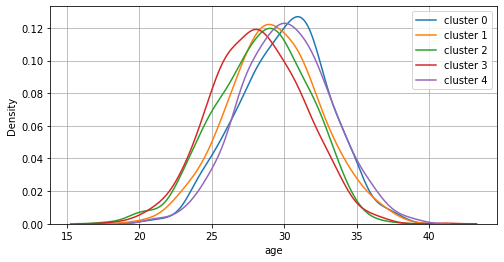

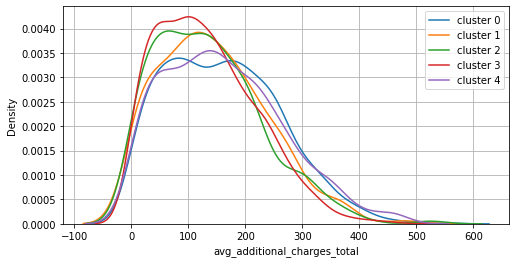

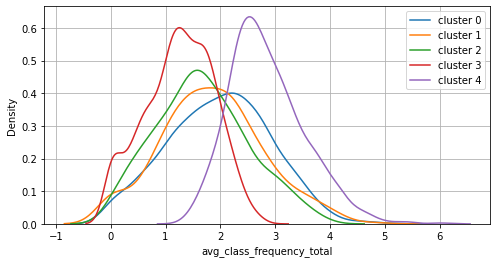

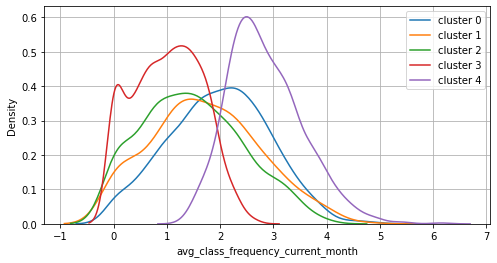

In [55]:
for column in noncat_features_clusters:
    plt.figure(figsize=(8,4))
    plt.grid(True)
    for i in range(0,5):
        sns.distplot(gym_clusters.query('cluster == @i')[column], hist=False, kde_kws={'label':'cluster '+ str(i)})
        plt.legend()
plt.show()

**Вывод:** Можно сделать следующие выводы:
- Кластеры с большим оттоком более «молодые» (3-й кластер — 28 лет в пике, 2-й кластер — 29 лет), а кластеры с наименьшим оттоком более возврастные (0-й кластер — 31 год в пике, 4-й — 30 лет)
- По дополнительным тратам: кластеры с наименьшим оттоком тратят больше, меньше всего тратит кластер 3 (кластер с наивысшим оттоком)
- По активности в целом и за последний месяц: наиболее «активен» кластер 4 с 2-3 посещениями в неделю; самый «неактивный» — кластер 3 с 1 занятием в неделю

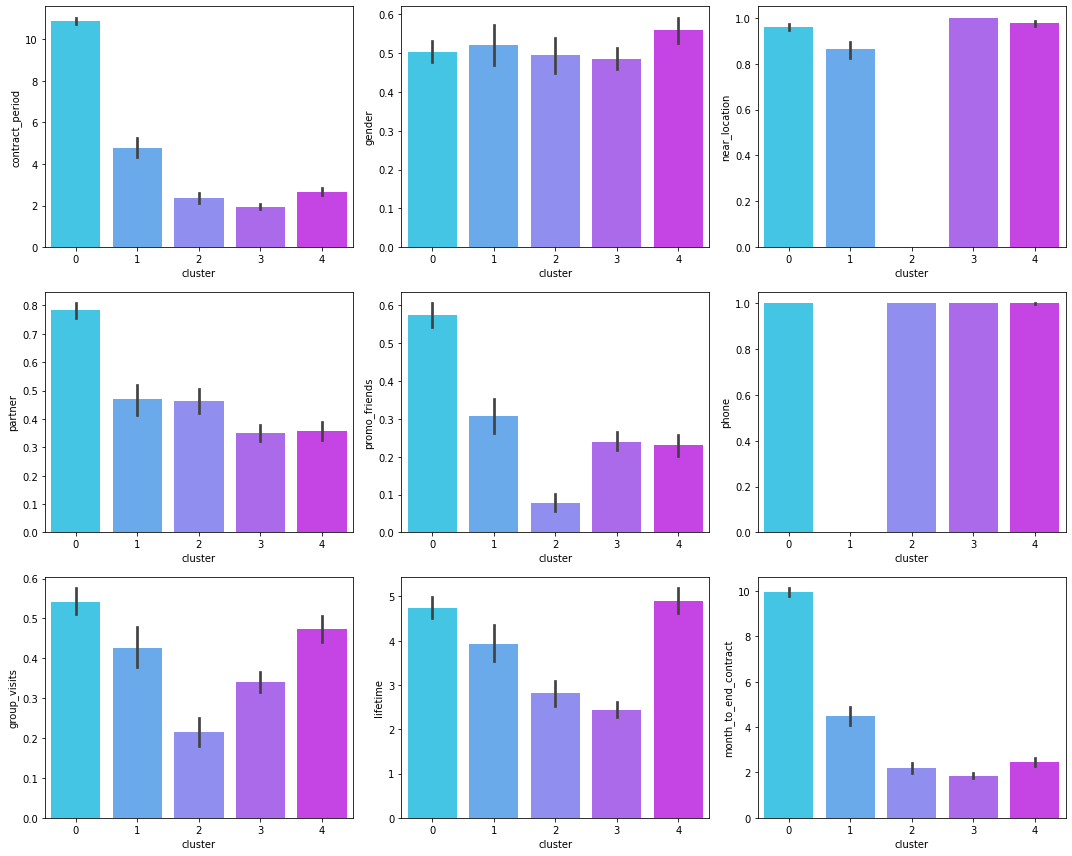

In [56]:
plt.figure(figsize=(15,12))
for i in range(len(cat_features_clusters.columns)):
    plt.subplot(3,3,i+1)
    x = gym_clusters['cluster']
    y = cat_features_clusters.iloc[:,i]
    sns.barplot(x=x, y=y, palette='cool')
plt.tight_layout()
plt.show()

**Вывод:** Можно сказать следующее:
- Как мы уже видели ранее в таблице, никто из клиентов кластера 1 не оставлял номер телефона, а также никто из клиентов кластера 2 не живет/не работает рядом с фитнес-центром
- Очень наглядна картина по время с момента первого посещения: новые клиенты как раз принадлежат к «оттекающим» кластерам (2 и 3)
- Групповые занятия больше всех посещает кластер 0, и он же имеет самые высокие показатели по *partner* и *promo_frinds*, что возможно связано, ведь у людей тогда есть с кем ходить на занятия
- Картина по длительности абонемента выглядит необычно у кластера 4 с его низкой длительностью абонемента (в сравнении с таким же надежным 0-м кластером, у которого большинство абонементов годовые)

## Выводы и рекомендации

Основной напрашивающийся вывод: стоит обратить внимание на новых клиентов, так как они более всего подвержены оттоку. Так как они в основном покупают месячный абонемент (можно сказать пробный), возможно, стоит давать какие-то дополнительные скидки в самом начале, устраивать акции, можно предлагать более длительный абонемент с большой скидкой и возможностью попробовать групповые занятия бесплатно или с бесплатным первым посещением спа-салона. Еще стоит обратить внимание на взаимодействие новых клиентов с друзьями, например предлагать при покупке более длительного абонемента какие-то скидки или бесплатный месячный абонемент для друга. 
Что касается постоянных клиентов, то они почти не склонны к оттоку, но по какой-то причине часто покупают абонементы по месяцу, что может говорить о неидеально продуманных условиях длительных абонементов. Возможно, стоит ввести некую программу лояльности для постоянных клиентов. 